# Capstone Project - Spotify Music Dataset 

<b> Corbin McKay
    
<b> COSC 3380
    
<b> Dr. Hernandez
    
<b> Due 12/08/2022



In [81]:
# Importing required modules
import numpy as np #import numpy using np as an alias
import pandas as pd #import pandas using pd as an alias
import matplotlib.pyplot as plt #import matplotlib.pyplot using plt as an alias
import seaborn as sns #import seaborn using sns as an alias

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #import encoding related classes
from sklearn.preprocessing import StandardScaler, MinMaxScaler #import scaling related classes

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, silhouette_score
from sklearn.metrics import plot_confusion_matrix

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# In some dataframes, you may need to configure the display.max.columns option to make sure pandas doesn’t hide any columns. 
pd.set_option("display.max.columns", None)

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Utility functions
def split_dataset(X, y, test_size=None, stratify=False):
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True, stratify=y)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return (X_train, X_test, y_train, y_test)

def display_cross_validation_results(model, X_train, y_train, folds):
    results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy')
    print(f"Cross validation results with {folds} folds: {results}")

### Machine Learning Project Checklist
- 1. Frame the problem 
- 2. Get the data
- 3. Explore the data
- 4. Prepare the data
- 5. Explore models and shortlist the best ones
- 6. Fine-tune your models and combine them into a great solution

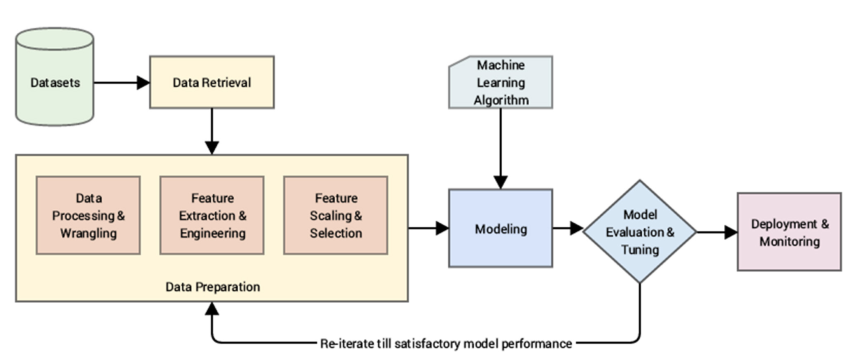

### Framing the Problem 

In music, there are many common chord progressions and keys among popular songs. <br>
Here is a fun video displaying songs with the same four chords: 
https://www.youtube.com/watch?v=5pidokakU4I&ab_channel=random804 <br>

What other data could we use to explore problems regarding songs? What can we predict? What features would such dataset use?

### Collecting the Data
Dataset: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre  <br>
- Dataset for list of songs(tracks) and audio features provided by Spotify API
- After looking at the features there were two main problems I decided I wanted to sovle:
    - Can we predict the popularity of a songs based on the given features? 
    - Can we make song recommendations by using clustering?


In this notebook I will be solving the problem of predicting popularity.<br>
For problem will use supervised learning - Labels are known, training set includes desired solutions <br>
Regression will be used - We are predicting a target numerical value



### Load Dataset

In [2]:
music_df = pd.read_csv("music_genre.csv")

In [3]:
# Display first 5 records
music_df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
# number of rows (entries) and columns (features)
music_df.shape

(50005, 18)

#### Feature Description
- <font color=blue> instance_id </font>: Unique id for each song
- <font color=blue> artist_name </font>: The name of the artist who made the song
- <font color=blue> track_name </font>: The name of the song/track
- <font color=blue> popularity </font>: The percentile of popularity the song falls into/how popular the music is (ranges from 0-99)
- <font color=blue> acousticness </font>: This value describes how acoustic a song is. Ranges from 0.0-1.0 . The higher the value, the more acoustic the song is.
    - Acoustic: instruments of which sound is produced without any electrical equiptment
- <font color=blue> danceability </font>: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. Values range from 0.0-1.0, with higher values indicating higher danceability.
- <font color=blue> duration_ms </font>: The duration of the song, measured in ms. 
- <font color=blue> energy </font>: Measure of intensity and activity. Ranges from 0.0-1.0 with 1 being the most energetic.
- <font color=blue> instumentalness </font>: This value represents the amount of vocals in the song. Ranges from 0.0-1.0
- <font color=blue> key </font>: The grouping of pitches, or notes, that form the harmonic foundation for a piece of music.
- <font color=blue> liveness </font>: This value describes the probability that the song was recorded with a live audience. Values range from 0.0-1.0 .According to Spotify, a value about 0.8 provides strong likelihood that the track is live."
- <font color=blue> loudness </font>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values range between -60 and 0 dB. 
- <font color=blue> mode </font>: The modality (major or minor) of a track. Major = 1, and minor = 0
- <font color=blue> speechiness </font>: Detects the presence of spoken words in a track. Ranges from 0.0-1.0
    - Values above 0.66 describe tracks that are most likely made entirely of spoken words. Such as talk shows, audio books, podcasts.
    - Values between 0.33 and 0.66 describe tracks that may contain both music and speech.
    - Values below 0.33 most likely represent music and other non-speech like tracks.
- <font color=blue> tempo </font>: The overall estimated tempo of a track, measured in beats per minute (BPM). Speed/Pace
- <font color=blue> obtained_date </font>: The date the song data was pulled from the Spotify API
- <font color=blue> valence </font>: Measures musical positiveness conveyed by a track. Ranges from 0.0-1.0
    - A higher value indicates the track sound is more positve (e.g. happy, cheerful) 
    - A lower value indicates the track is more negative (e.g. sad, angry)
- <font color=blue> music_genre </font>: Categorical charictarization of a particular style, form, or content. 10 different genres in our dataset.

Display numerical data

In [6]:
# average popularity percentile is 44.22
music_df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [7]:
# display the five most popular songs
popularity_df = music_df.sort_values(by='popularity', ascending=False)
popularity_df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
26239,84744.0,Post Malone,Wow.,99.0,0.163,0.833,149520.0,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4-Apr,0.385,Rap
25194,59859.0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,97.0,0.556,0.760,158040.0,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4-Apr,0.913,Rap
47024,89355.0,J. Cole,MIDDLE CHILD,96.0,0.149,0.837,213594.0,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4-Apr,0.463,Hip-Hop
105,49721.0,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",96.0,0.153,0.841,212500.0,0.798,0.000003,C#,0.0618,-4.206,Minor,0.2290,95.948,4-Apr,0.591,Electronic
47596,86123.0,Paulo Londra,Adan y Eva,95.0,0.323,0.767,258639.0,0.709,0.000000,C#,0.0676,-4.470,Major,0.3360,?,4-Apr,0.720,Hip-Hop


In [8]:
# displays top 10 artists based on track count within the dataset
artist_df = music_df['artist_name'].value_counts().sort_values(ascending=False)
artist_df.head(10)

empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
Frédéric Chopin             241
Drake                       172
Capcom Sound Team           169
Yuki Hayashi                167
Eminem                      147
Name: artist_name, dtype: int64

In [9]:
# Number of different artists in dataset
artist_df.shape

(6863,)

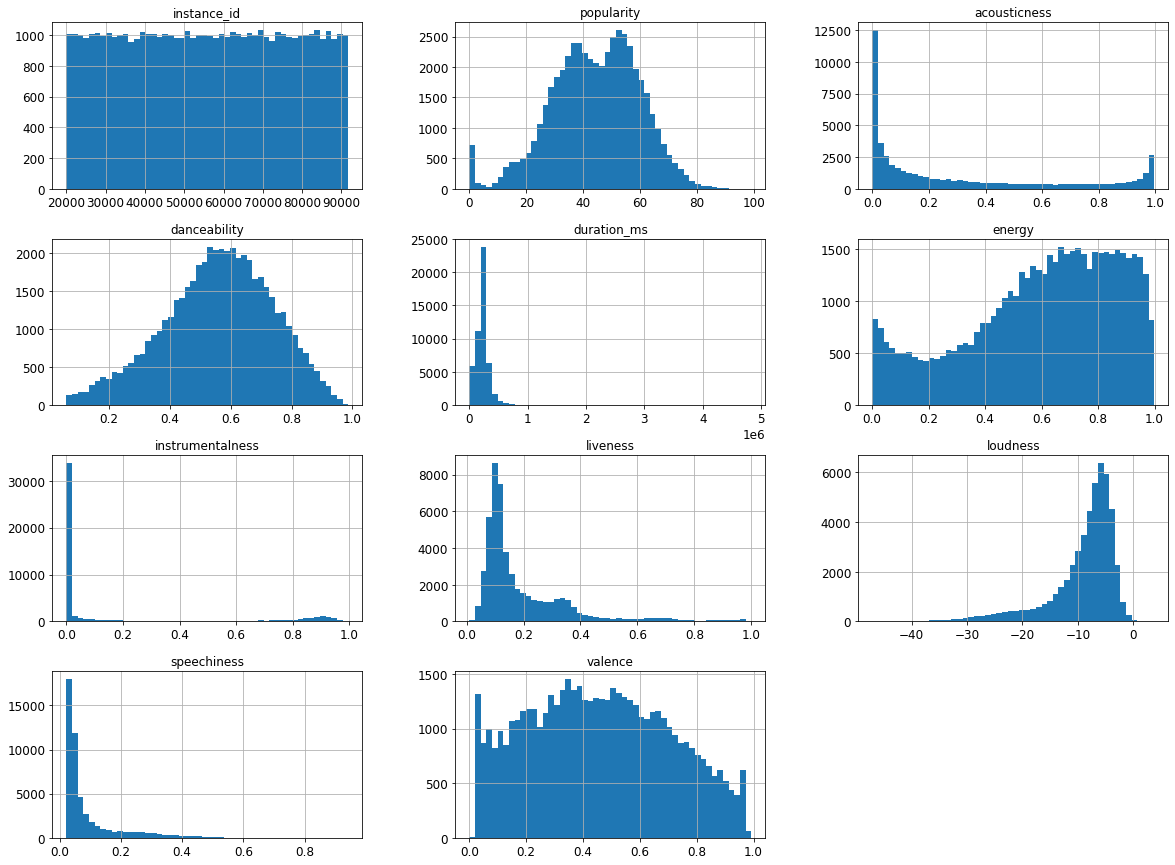

In [10]:
music_df.hist(bins=50, figsize=(20,15))
plt.show()

- Values are well distributes for popularity, danceability, energy, valence
- Acousticness has a big value count at 0.0, meaning fully electric/no acousticness
- Duration does not deviate much
- Instrumentalness is interestingly low
- Speechiness values are below 0.66, indicating that there are no talkshows or podcasts in our data

<AxesSubplot:xlabel='music_genre', ylabel='count'>

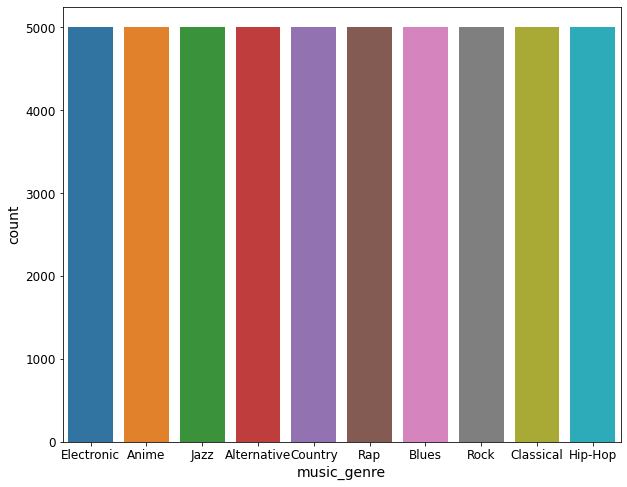

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(music_df['music_genre'])

Initial assumption was that there would a larger amount of electronic or jazz for instrumentalness to be so low. It goes to show that in the entire duration of a song, vocals only fill a fraction of the timespace. I am pleased to see an even distribution between the genres. It is interesting to see anime as a genre, as I am unsure what characterizes anime music. 

<AxesSubplot:xlabel='key', ylabel='count'>

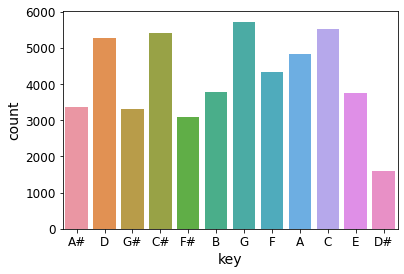

In [12]:
# countplot of the 12 different musical keys
sns.countplot(music_df['key'])

<AxesSubplot:xlabel='mode', ylabel='count'>

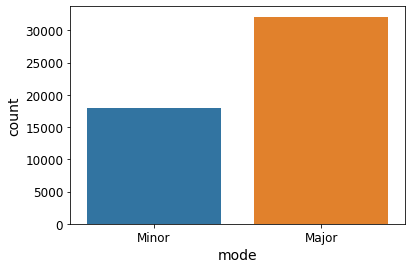

In [13]:
# Amount of songs in major or minor mode
sns.countplot(music_df['mode'])

#### What impact does genre have on popularity?

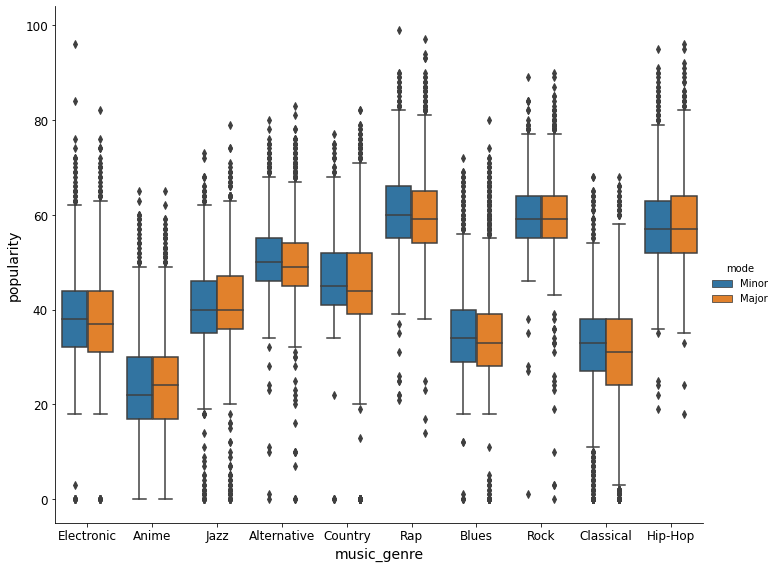

In [14]:
# catplot genre popularity based on mode 
sns.catplot(data=music_df, x="music_genre", y="popularity", hue="mode", kind="box",
           height = 8, aspect = 1.25)

In [15]:
# further viewing the numerical attribute averages based on genre
music_df.groupby("music_genre").mean().sort_values(by = "popularity", ascending=False)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
music_genre,,,,,,,,,,,
Rap,55408.4536,60.4974,0.169057,0.696605,196508.7920,0.651301,0.009084,0.198035,-6.668337,0.186707,0.454999
Rock,56025.3756,59.6412,0.191394,0.539230,212818.3128,0.687792,0.054656,0.185961,-7.224354,0.053403,0.520361
Hip-Hop,56253.0368,58.3996,0.179093,0.717373,198395.9458,0.644334,0.010836,0.200870,-6.851158,0.207044,0.474927
Alternative,56028.4330,50.2242,0.164983,0.541124,210404.8078,0.710880,0.060818,0.197119,-6.517714,0.088819,0.447513
Country,56093.5680,46.0100,0.268827,0.577316,195556.0686,0.638903,0.005320,0.187781,-7.297150,0.049032,0.536732
Jazz,55764.8100,40.9286,0.494564,0.584736,238092.4468,0.474847,0.354271,0.171721,-11.185364,0.073629,0.509248
Electronic,56038.9298,38.1118,0.121971,0.619220,244553.3832,0.738636,0.348139,0.209782,-7.034238,0.098891,0.389884
Blues,55996.8810,34.8040,0.317830,0.529243,229301.0962,0.609753,0.094134,0.233206,-9.009528,0.062157,0.580788
Classical,55630.0076,29.3158,0.869139,0.306560,278014.3464,0.176534,0.600692,0.161046,-21.586253,0.051575,0.210523


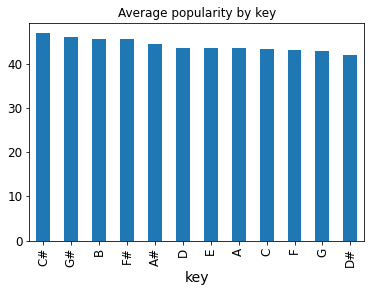

In [16]:
music_df.groupby("key").mean().sort_values(by=['popularity'], 
                                              ascending=False).plot(kind="bar", 
                                                                              y="popularity", 
                                                                              xlabel="key", 
                                                                              legend=False, 
                                                                              title="Average popularity by key")

plt.show()


In [17]:
# Top 5 artist by average popularity 
music_df.groupby("artist_name").mean().sort_values(by = "popularity", ascending=False).head()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
artist_name,,,,,,,,,,,
Duki,87179.0,82.0,0.42000,0.64100,244771.0,0.652,0.000002,0.094000,-8.575,0.264000,0.406
Heuss L'enfoiré,90144.0,81.0,0.00937,0.81100,162907.0,0.692,0.000000,0.059800,-2.836,0.105000,0.817
NSG,76888.0,81.0,0.38700,0.83600,-1.0,0.621,0.000092,0.104000,-4.685,0.089200,0.762
Coolio,66223.0,80.0,0.06550,0.64700,240693.0,0.514,0.000000,0.398000,-10.050,0.059300,0.387
Danny Ocean,65051.5,80.0,0.19870,0.74075,144598.5,0.746,0.000000,0.078525,-5.858,0.137425,0.553


In [18]:
# music_df[music_df['artist_name'] == "Danny Ocean"] -- Tested for all top 5 above, 
# number of entries ranged from 1-4, small sample size results in high avg

<AxesSubplot:>

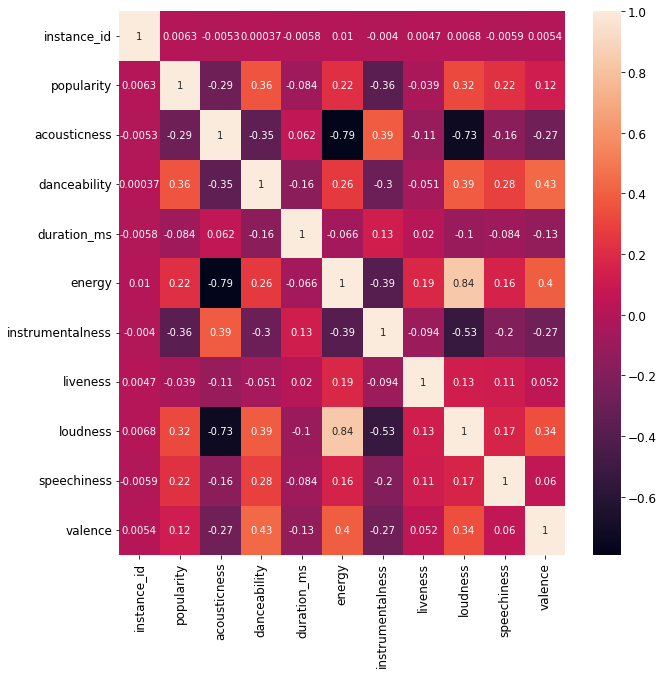

In [19]:
# correlation between numerical attributes
plt.figure(figsize=(10,10))
sns.heatmap(music_df.corr(), annot=True)

### Data Cleaning/Feature Engineering

To prepare the data for the models, the following tasks must be performed
- <b>Data Cleaning</b>
    - Remove or fill in null values, handling outliers, reduce noice, eliminate erroneous data (odd values)
- <b>Data Transformation</b>
    - Perform normalization/scaling. 
    - Convert categorical data to numerical data
        - Replacing: We replace categorical data with a number. Done by assigning a number each unique categorical data. Can be a hassle if there are many different categorical values. 
        - Encoding: Another form of transforming categerical data to numerical
            - <u>Label Encoding</u>: Replaces each value in a categorical column with a number ranging between 0 to n-1, where n represents the number of unique values. The model may consider higher values more favorable.
            - <u>One Hot Encoding</u>: The converted numerical values are assigned to their own labels, divides into n columns. Multicollinearity may be in issue due to high correlation from created labels. Can be an issue in Linear Regression and Logistic Regression models.
- <b>Data Reduction</b>: Analyze attributes/features that are not needed for the model (Unnecessary, or weakly correlated)
- <b>Data Scaling</b>: Reduction of the magnitudes/ranges of features. 
    - Standardization is scaled where values are centered around the mean and with a unit standard deviation. (Value-Mean / Std Dev). 
    - Normalization uses min-max scaling and ranges from 0 and 1. (Value-Min / Max-Min)
    - Helpful for algorithms that calc distances between data (KNN, Regression, SVMs)
    

In [20]:
#Find out missing values for each column
music_df.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

All 18 features have 5 missing values, leading me to believe there are 5 null rows.

In [21]:
music_clean = music_df.copy()

In [22]:
# locate null data
music_clean[music_clean.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since all null values are located in the same rows, I will not need to worry about replacing missing values. Otherwise, I would replace missing numerical values with the mean of its given feature. For missing artist name, I would consider removing the row entirely. For other categorical data such as mode, key, or genre, I would use imputation to compute the mode for replacement.

In [23]:
#Removing Null values
music_clean = music_clean.dropna()

In [24]:
# verify that null/missing values have been removed
music_clean.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

Address empty_field value for artist name discovered in data exploration <br>
Begs the question: Is artist name an important factor in determining popularity? <br>
Would this be erroneous data that will impact our predictions?

In [25]:
music_clean[music_clean['artist_name'] == 'empty_field'].shape

(2489, 18)

In [26]:
# remove entries where artist_name = empty_field
music_clean.drop(music_clean.index[music_clean['artist_name'] == 'empty_field'], inplace = True)

In [27]:
# verify entries have been removed
music_clean[music_clean['artist_name'] == 'empty_field'].shape

(0, 18)

In [28]:
# 50000 total entries - 2489 entries with empty_field = 47511, verifying music_df shape is correct
music_clean.shape

(47511, 18)

#### Data Reduction
What features are not needed in our dataset?

In [29]:
music_clean = music_clean.drop(["instance_id", "track_name", "obtained_date"], axis=1)

#### Data Transformation

In [30]:
# View categorical features
music_column_category = music_clean.select_dtypes(exclude=[np.number]).columns
music_clean[music_column_category].head()

,artist_name,key,mode,tempo,music_genre
0,Röyksopp,A#,Minor,100.889,Electronic
1,Thievery Corporation,D,Minor,115.00200000000001,Electronic
2,Dillon Francis,G#,Major,127.994,Electronic
3,Dubloadz,C#,Major,128.014,Electronic
4,What So Not,F#,Major,145.036,Electronic


In [31]:
# Converting tempo from string to float
tempo_df = music_clean['tempo'].value_counts().sort_values(ascending=False)
tempo_df.head(10)

?                     4720
120.0                   16
100.00299999999999      16
140.007                 16
130.016                 15
120.01899999999999      14
100.00200000000001      14
95.006                  14
100.014                 13
120.015                 13
Name: tempo, dtype: int64

In [32]:
# remove entries where tempo equals ?
music_clean.drop(music_clean.index[music_clean['tempo'] == '?'], inplace = True)

In [33]:
music_clean[music_clean['tempo'] == '?'].shape

(0, 15)

In [34]:
music_clean = music_clean.astype({'tempo': 'float'})

#### Label Encoding

In [35]:
#Creating the object instance
label_encoder = LabelEncoder()

for i in music_column_category:

    music_clean[i] = label_encoder.fit_transform(music_clean[i])

print("Label Encoded Data: ")

music_clean.head()

Label Encoded Data: 


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,4833,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,9414,0.759,5
1,5880,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,13181,0.531,5
2,1527,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,17002,0.333,5
3,1638,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,17022,0.270,5
4,6268,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,21729,0.323,5


#### Data Scaling/Normalization

In [36]:
minmax_scale = MinMaxScaler().fit_transform(music_clean)

mm_df = pd.DataFrame(minmax_scale,columns=music_clean.columns)

mm_df.head()

mm_df.describe()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
count,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000,42791.000000
mean,0.499037,0.447007,0.307322,0.538801,0.049147,0.600298,0.182655,0.486708,0.186133,0.746645,0.358790,0.077729,0.498940,0.460256,0.501946
std,0.289410,0.157116,0.342396,0.193042,0.028259,0.264581,0.327089,0.314777,0.163283,0.120931,0.479651,0.110128,0.276047,0.249179,0.319265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259582,0.343434,0.020181,0.413860,0.038847,0.432984,0.000000,0.272727,0.088082,0.712798,0.000000,0.015005,0.266346,0.260081,0.222222
50%,0.490683,0.454545,0.145582,0.549870,0.048778,0.642359,0.000162,0.454545,0.117466,0.782890,0.000000,0.029031,0.511261,0.451613,0.555556
75%,0.742539,0.565657,0.553213,0.677245,0.059713,0.816671,0.155622,0.727273,0.236618,0.824306,1.000000,0.083505,0.726517,0.653226,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Explore Models

#### Linear Regression

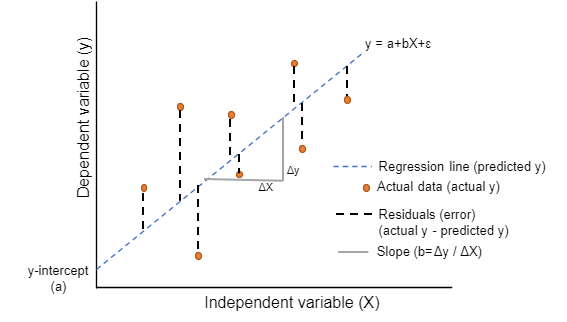
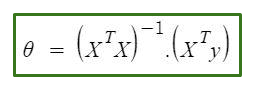
𝛉
 is the value of θ that minimizes the cost function.

y is the vector of target values containing y(1) to y(m).

In [48]:
X = mm_df.drop('popularity', axis=1)
y = mm_df['popularity']
print(X.shape)
print(y.shape)

(42791, 14)
(42791,)


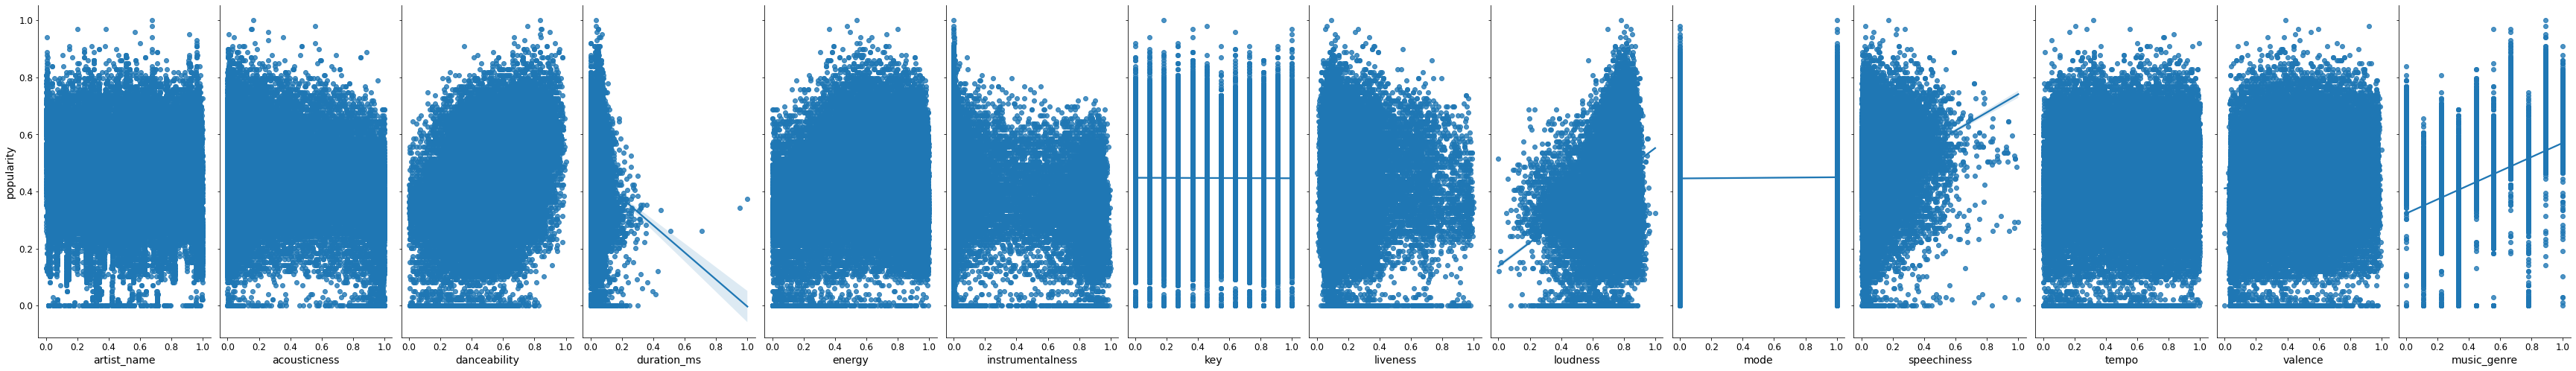

In [44]:
sns.pairplot(mm_df, x_vars=features, y_vars='popularity', height=7, aspect=0.5, kind='reg')

In [65]:
lin_reg = LinearRegression()

In [66]:
# perform 80/20 train-test split
X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=0.2)
   
print("Dataset Split Shapes")
print("-----------------")
print(f"X_train shape: {X_train.shape}")
print(f"y_train_val shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("")

Dataset Split Shapes
-----------------
X_train shape: (34232, 14)
y_train_val shape: (34232,)
X_test shape: (8559, 14)
y_test shape: (8559,)



In [67]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [72]:
# Apply trained model to make prediction on test set
y_pred = lin_reg.predict(X_test)

<b>Metrics to evaluate Regression Model</b>
- Mean Square Error(MSE)/ Root Mean Square Error(RMSE)
    - RMSE: How much error the system typically makes in its predictions
    - Need to find the value of 0 that minimizes the RMSE; Simpler to minimize MSE than RMSE and leads to same result
- R Square: statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
- Mean Absolute Error(MAE): Similar to MSE, uses sum of absolute value of error instead of sum of squares of error

In [79]:
# Display Model Performance
# For MSE & MAE, the lower the number the better (closer to zero)
# For R^2, bigger value indicates better fit
print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred)) 
print('R Squared: %.3f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: [-0.00432011 -0.05475467  0.08175364 -0.09687516 -0.03911518 -0.10597164
  0.00421987 -0.05894409  0.13932307 -0.00093313  0.07984688 -0.00887041
 -0.03253392  0.20610305]
Intercept: 0.2848801579939285
Mean Squared Error: 0.015
R Squared: 0.393
Mean Absolute Error: 0.096


<AxesSubplot:xlabel='popularity'>

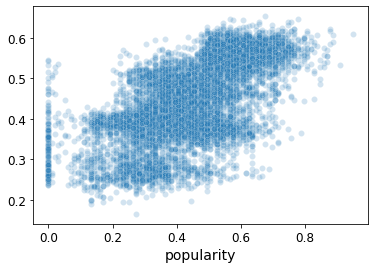

In [88]:
sns.scatterplot(y_test, y_pred, alpha=0.2)

#### Polynomial Regression

In [110]:
poly_features = PolynomialFeatures()

In [111]:
poly_features.fit(X_train, y_train)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_pred_poly = poly_model.predict(poly_features.fit_transform(X_test))
print('Coefficients:', poly_model.coef_)
print('Intercept:', poly_model.intercept_)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred_poly)) 
print('R Squared: %.3f' % r2_score(y_test, y_pred_poly))
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred_poly))

Coefficients: [-7.78470291e-16 -1.74978959e-02  1.23168181e-02 -1.90107540e-01
  6.91578759e-01  3.71989390e-01  1.17102423e-01 -3.77542293e-02
 -4.15453164e-01  4.73217996e-02  9.84888146e+11  8.34338976e-02
 -5.59205416e-02  9.09849033e-02 -3.55273392e-01 -3.04183817e-02
 -2.49203827e-02 -2.31361205e-02 -2.41221771e-01 -3.04252424e-02
  3.32101341e-02  6.00358923e-03  1.59784064e-02  7.62896144e-02
  6.23483820e-03 -7.42100056e-02 -1.07917422e-02  2.47994074e-02
  3.00929479e-02 -9.34392920e-02  6.31749339e-03 -2.23228286e-01
 -9.90283487e-02  3.78076011e-02  1.03100052e-02 -9.64266116e-02
  9.68789244e-02  2.87960105e-04  5.00879146e-03  6.75146924e-03
 -4.74929003e-03  6.86395140e-02  1.11105753e-01  2.53687602e-01
 -1.67057755e-01 -8.55970346e-02 -4.42895699e-03  5.77316718e-02
  4.25604581e-01  1.13324323e-02 -1.26095511e-01  1.29924314e-02
 -2.71539102e-02 -4.97634676e-02 -1.93654597e-01  2.33779762e-01
  5.27276361e-01  8.28246603e-02  6.88060096e-02 -1.42321980e+00
  1.7540731

#### Decision Trees, Random Forest, SVM Regression
- Analyzing models that do not rely on linearity

<b>Decision Trees</b>
- Divide and conquer, recursively divides a training set, each leaf node represents a class. Decision is made at each non-leaf node. 



In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred)) 
print('R Squared: %.3f' % r2_score(y_test, y_pred_poly))
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.017
R Squared: 0.469
Mean Absolute Error: 0.098


<b>Random Forest</b>
- Ensemble of randomly created decision trees. Each tree produces a result and the results are averaged. 
- Trained through bagging (random sampling with replacement)

In [108]:
from sklearn.ensemble import RandomForestRegressor
randtree_reg = RandomForestRegressor()
randtree_reg.fit(X_train, y_train)

y_pred = randtree_reg.predict(X_test)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred)) 
print('R Squared: %.3f' % r2_score(y_test, y_pred_poly))
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.009
R Squared: 0.469
Mean Absolute Error: 0.070


<b>Support Vector Machines</b>

In [109]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR()
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred)) 
print('R Squared: %.3f' % r2_score(y_test, y_pred_poly))
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.015
R Squared: 0.469
Mean Absolute Error: 0.095


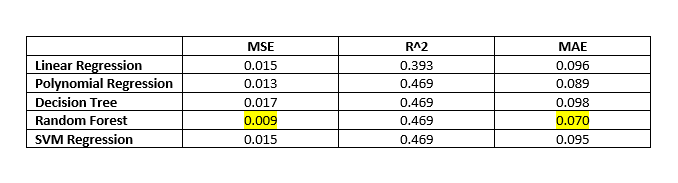

- Random Forest model had the best performance over all three metric scores. 
- R^2 had the same result in four models, so will not be heavily factored in the ensemble decision

## Conclusions/Lessons-Learned

- The data preparation stage prove to be the lengthiest. Spotifys data is very unique and fascinating. It took some time to research and understand all of the features.
- The data exploration stage was very fun and enjoyable. There was so much to learn and discover. I always found myself asking questions and cycling back to the data visualization section to better understand any new problems or curiosities.
- I had a more difficult time with regression compared to with classification. Many of the examples and projects revolved around classification problems, so I found myself spending a lot of time reading and researching. The textbook at times lacked detail in the regression data being used. 
- Challenges selecting models. Initially followed linear models, and then explored non-linear models. Challenge with implementing new models and learning how to measure performance.
- Should artist name be encoded? Ultimately, I felt that artists have correlation to popularity and that my model would be weaker if I removed that feature. What about song names? I believe that certain names of tracks can some form of impact on popularity. We see "catch" or "grab" words on advertisments, youtube videos, etc. Converting song_names to usable data would ahve been a challenge. I had an idea of partitioning the words in song names, and encoding the words. This idea was quickly scrapped.
- Were my outliers "true" outliers or should they have been removed. Most values were scaled to a specified range by spotify. If an artist belongs in the 99th percentile, should they be considered an outlier? Ultimately I felt they were integral to the data. However, I am curious if the removal of outliers and further noise or dimensionality reduction would have improved results. 
- Polynomial Regression and Random Forest performed the best. I did not reach the stage of fully getting to explore fine-tuning and building ensemble models to improve performance. 
- Originally I had two other problems I wanted to solve as well for this project. I wanted to perform supervised learning using classification to predict music genres, and unsupervised learning to perform clustering in order to make song recommendations based on a songs cluster and nearest neighbors. In the end I found the data preparation stage was too lengthy for me to commit to multiple problems. I believe I would have accomplished more in the modeling and tuning stage if I had tackled the other problems. I do not regret choosing a regression problem as I felt I learned the most by selecting this problem due to the lack of material and personal projects on regression. 
